In [51]:
# code to load MEaSUREs Phase-Based Antarctica Ice Velocity Map
# netcdf file, calculate velocity magnitude and plot

# import packages
import os
import xarray as xr
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# define data directory (replace with your data directory file path)
DATA_DIR = '/Volumes/ExtremeSSD/data/'

In [52]:
# download MEaSUREs Phase-Based Antarctica Ice Velocity Map, Version 1 from:
# https://nsidc.org/data/NSIDC-0754/versions/1
# relocate to DATA_DIR
# load velocity file as variable (adjust enclosing folder name and file name if needed)
measures_vel_path = os.path.join(DATA_DIR, 
    'velocity/measures-phase_v1/antarctic_ice_vel_phase_map_v01.nc')

In [53]:
# format for rasterio loading netcdf
vel_dataset = xr.open_dataset(DATA_DIR + 
    '/velocity/measures-phase_v1/antarctic_ice_vel_phase_map_v01.nc')
# calculate velocity magnitude
V_mag = (vel_dataset['VX']**2 + vel_dataset['VY']**2)**0.5

In [54]:
# test points for sanity check on calculated velocity
# (three drill sites from WISSARD and SALSA)
coords=[[-295743.804392, -502137.677718],
       [-278502.862779,-561384.761658],
       [-173785.999994,-590925.999998]]

# Calculate the vector magnitude at the sample points and print the result
for site in range(len(coords)):
       print(V_mag.sel(x=coords[site][0], y=coords[site][1], method="nearest").values)

242.26247
353.7625
348.50708


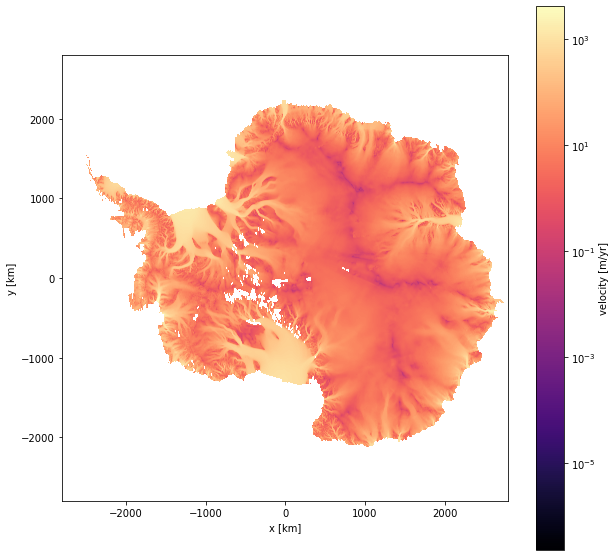

In [55]:
# plot velocity at continental scale
fig, ax = plt.subplots(figsize=(10,10))
mappable = ax.imshow(V_mag,
    extent=[V_mag['x'].min()/1000,V_mag['x'].max()/1000,
            V_mag['y'].min()/1000,V_mag['y'].max()/1000],
    norm=LogNorm(), cmap='magma')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
cbar = fig.colorbar(mappable)
cbar.set_label('velocity [m/yr]')
plt.show()